<a href="https://colab.research.google.com/github/ris-shar/Mnist_Model/blob/main/TfRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#importing lib
import tensorflow as tf
import matplotlib




In [ ]:
# input = tf.keras.Input(shape=(784,))

In [ ]:
#getting the mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
au = x_test
print(x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
#Making a class for z and then activating it with relu
class Linear(tf.keras.layers.Layer):
  def __init__(self, units, input_dim):
    super(Linear, self).__init__()
    self.units = units
    self.input_dim = input_dim
    self.w = self.add_weight(shape=(self.input_dim, self.units), initializer="random_normal", trainable=True)
    self.b = self.add_weight(shape=(self.units,), initializer="zeros", trainable=True)
  def call(self, inputs):
    y = tf.matmul(inputs, self.w) + self.b
    
    
    return y


In [ ]:
#A class to make layers and activate
class MLPBlock(tf.keras.layers.Layer):
  def __init__(self):
    super(MLPBlock, self).__init__()
    self.linear_a = Linear(128, 784)
    self.linear_b = Linear(128, 128)
    self.linear_c = Linear(10, 128)

  def call(self, inputs):
    x = self.linear_a(inputs)
    y = tf.nn.relu(x)
    x1 = self.linear_b(y)
    y1 = tf.nn.relu(x1)
    x2 = self.linear_b(y1)
    y2 = tf.nn.softmax(x2)
    return self.linear_c(y2)

x_train = x_train.reshape((60000, 784))
input = tf.keras.Input(shape=(784,))
mlp = MLPBlock()
output = mlp(input)
print(output)


KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='mlp_block/linear_2/add:0', description="created by layer 'mlp_block'")


In [ ]:
model = tf.keras.Model(inputs=input, outputs=output)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
epochs = 3
model.fit(x_train, y_train, epochs=epochs)
y_test.shape

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3291 - accuracy: 0.1157
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1161
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1161


(10000,)

In [ ]:
x_test = x_test.reshape((10000, 28*28 ))
print(x_test[0].shape)
pred = model.predict(x_test)
print(pred[0], y_test[0])

(784,)
313/313 [==============================] - 0s 1ms/step
[-0.01868378 -0.0158064  -0.00961277 -0.00236997 -0.00241577 -0.01133318
 -0.00355429 -0.00653467 -0.01797369 -0.0159423 ] 7


7


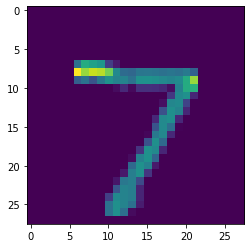

In [ ]:
import matplotlib.pyplot as plt
print(y_test[0])
plt.imshow(au[0])

In [ ]:
# #making layers using Linear class
# layer_a = Linear(784, x_train.shape[0])(input)
# layer_b = Linear(10, x_train.shape[0])(layer_a)
# layer_c = Linear(10, x_train.shape[0])(layer_b)




In [ ]:
# x_train[0]

In [ ]:
#making dense layers using sequential
# dense = tf.keras.layers.Dense(64, activation="relu")
# x = dense(x_train)

In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x)

In [ ]:
# assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [ ]:
# linear_layer = Linear(32, 2)

In [ ]:
# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1) 

In [ ]:
# model = tf.keras.models.Sequential()

In [ ]:
# model.add(tf.keras.layers.Flatten())


In [ ]:
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss, val_acc)

In [ ]:
# model.save('numer_reader.model')

In [ ]:
#  def build(self, input_shape):
#       self.w = self.add_weight(shape=(input_shape[-1], self.units),
#                                initializer='random_normal',
#                                trainable=True)

In [ ]:
# class L